# JK301 Visual Impact on Phoneme Perception in Noise with Natural Sentences

We are going to look at the pilot data and try to attack a few key questions with this notebook.

1. How much does lip reading improve phonemic perception of clear vs noisy speech?

2. Does this interaction change over the course of a sentence?

3. Do some phonemes benefit from speechreading more than others?

### Loading...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame.from_csv('C:\\TCDTIMIT\\dataOut\\jk_VO\\bigP_jkVO.csv')

#Relabel babble condition for clarity
df.loc[df['BabbleCond'] == 'Off',('BabbleCond')] = 'Clear'
df.loc[df['BabbleCond'] == 'On',('BabbleCond')] = 'Noisy'
df.loc[df['VideoCond'] == 'Normal',('VideoCond')] = 'Audiovisual'
df.loc[df['VideoCond'] == 'Static',('VideoCond')] = 'Auditory Only'

#Make WordIdx start from 1, not zero
df.WordIdx = df.WordIdx+1


Lessons learned from Jk301 Initial Notes

In [3]:
# Fix phoneme alignment issue (correct word given but phonemes assigned to wrong word)
# Find where words match
matchIdx = df['SourceWord'] == df['TargetWord']
#Set the source phonemes to match the target
df.loc[matchIdx,('SourcePhoneme')] = df.loc[matchIdx,('TargetPhoneme')] 
#Reset the measure of phoneme accuracy
df.loc[:,'PhonemeHitBool'] = df['SourcePhoneme'] == df['TargetPhoneme']
#Set a measure all phonemes matching
df.loc[:,('AllPhonsMatch')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==1)
#Set a measure all phonemes missing
df.loc[:,('AllPhonsMiss')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==0)
# Make a column for the number of words in the sentence
df['NumWordsInSentence'] = df.groupby(['SentenceCount'])['WordIdx'].transform(max)+1

#Remove practice speaker (and last speaker)
df = df[df.Speaker != 's59F'] 
df.keys()

Index([u'index', u'Unnamed: 0.1', u'VideoFile', u'TargetSentence', u'Babble',
       u'TrialNum', u'SpellCorrSource', u'SourceSentence', u'Speaker',
       u'SentenceWordScore', u'dBSNR', u'Subject', u'SentenceType',
       u'VideoCond', u'BabbleCond', u'FileName', u'VerbalResponse',
       u'1LogGram', u'2LogGram', u'3LogGram', u'Indx', u'Word', u'UnTrn',
       u'StTrn', u'NSyll', u'NPhon', u'unsDENS', u'unsFDEN', u'unsLDEN',
       u'unsCDEN', u'strDENS', u'strFDEN', u'strLDEN', u'strCDEN', u'unsBPAV',
       u'unsFBPAV', u'unsLBPAV', u'unsCBPAV', u'strBPAV', u'strFBPAV',
       u'strLBPAV', u'strCBPAV', u'unsTPAV', u'unsFTPAV', u'unsLTPAV',
       u'unsCTPAV', u'strTPAV', u'strFTPAV', u'strLTPAV', u'strCTPAV',
       u'unsPOSPAV', u'unsFPOSPAV', u'unsLPOSPAV', u'unsCPOSPAV', u'strPOSPAV',
       u'strFPOSPAV', u'strLPOSPAV', u'strCPOSPAV', u'unsLCPOSPAV',
       u'unsFLCPOSPAV', u'unsLLCPOSPAV', u'unsCLCPOSPAV', u'strLCPOSPAV',
       u'strFLCPOSPAV', u'strLLCPOSPAV', u'strCLCPOSPA

In [4]:
#Make plots prettier
#Edited from Randel Olson and many at StackOverflow
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 


plt.rc('text', color = 'black') 
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('axes', titlesize = 18, labelsize = 14,labelcolor ='black')  
plt.rc('lines', linewidth=2,markersize = 10)
plt.rc('xtick',labelsize = 10,color ='black')
plt.rc('ytick',labelsize = 10,color ='black')
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
%matplotlib inline

In [5]:
df

,index,Unnamed: 0.1,VideoFile,TargetSentence,Babble,TrialNum,SpellCorrSource,SourceSentence,Speaker,SentenceWordScore,...,PhonemeHitBool,WordCount,WordIdx,TargetWord,SourceWord,WordACC,SentenceCount,AllPhonsMatch,AllPhonsMiss,NumWordsInSentence
0,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,True,0,1,the,the,1,0,True,False,8
1,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,True,0,1,the,the,1,0,True,False,8
2,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,False,1,2,news,cheese,0,0,False,False,8
3,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,False,1,2,news,cheese,0,0,False,False,8
4,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,True,1,2,news,cheese,0,0,False,False,8
5,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,False,2,3,agency,-,0,0,False,True,8
6,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,False,2,3,agency,-,0,0,False,True,8
7,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,False,2,3,agency,-,0,0,False,True,8
8,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,False,2,3,agency,-,0,0,False,True,8
9,0,0,C:/TCDTIMIT/volunteersSmall/s33F/straightcam/s...,the news agency hired a great journalist,babble15,0,the garage went out of the cheese,the garage went out of the cheese,s33F,14.285714,...,False,2,3,agency,-,0,0,False,True,8


### How much does lip reading improve phonemic perception of clear vs noisy speech?

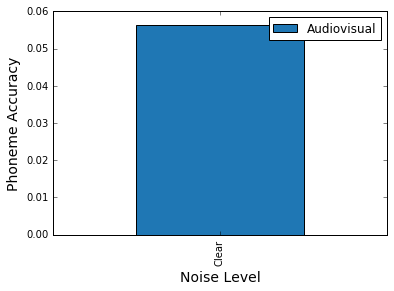

In [6]:
videoByBabble = df[['VideoCond','BabbleCond','PhonemeHitBool']].groupby(['BabbleCond','VideoCond']).mean().unstack()
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

Do we replicate Sumby and Pollack (1954)?  That is to say, do we find that the ratio of AV improvement over AO is roughly constant?  Calculated as (AOerrors-AVerrors)/AOerrors

In [7]:
videoByBabbleInvert = 1-videoByBabble.loc[:,:]
av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert


KeyError: 'Auditory Only'

Looks like in our case the amount phonemic improvement under noisy conditions is not only numerically higher, it's a somewhat higher ratio of improvement. However, it could be that our listening "ceiling" is less than 100% in practice, due to loss in working memory, spelling errors or accent confusion. We can examine the working memory issue by selecting only short sentences

PhonemeHitBool                         
VideoCond     Audiovisual Auditory Only SumbyRatio
BabbleCond                                        
Clear            0.069794      0.073282   0.047601
Noisy            0.322838      0.487122   0.337255

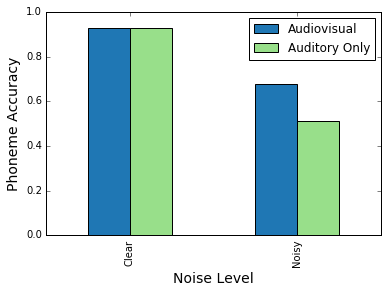

In [7]:
#Short Sentence Analysis
videoByBabble = df[['VideoCond','BabbleCond','PhonemeHitBool']].loc[df['NumWordsInSentence'] < 10,:].groupby(['BabbleCond','VideoCond']).mean().unstack()
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]
av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

Huh, that's weird. For short sentences the difference in AV improvement between clear and noisy is even greater? How about if we pick only long sentences?

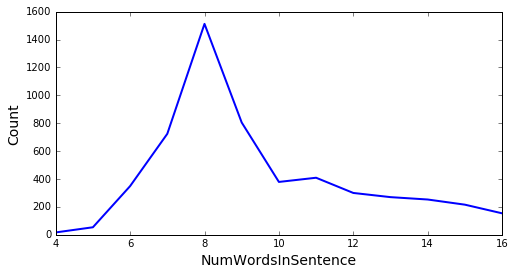

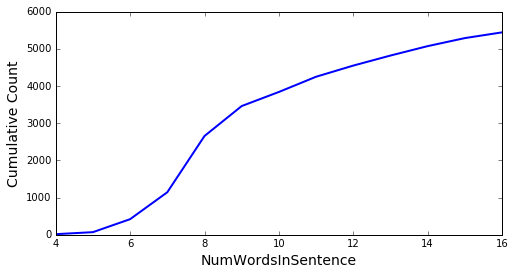

In [8]:
data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Count')

data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count().cumsum()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Cumulative Count')

PhonemeHitBool                         
VideoCond     Audiovisual Auditory Only SumbyRatio
BabbleCond                                        
Clear            0.213322      0.250708   0.149120
Noisy            0.490573      0.645701   0.240247

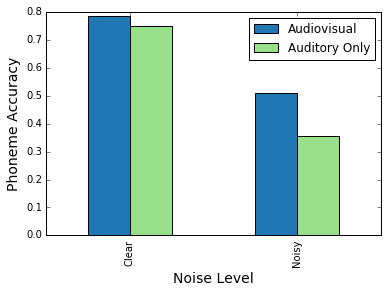

In [9]:
#Long sentence analysis
videoByBabble = df[['VideoCond','BabbleCond','PhonemeHitBool']].loc[df['NumWordsInSentence'] >= 10,:].groupby(['BabbleCond','VideoCond']).mean().unstack()
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]
av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

Weird, the visual info is more helpful for longer sentences under clear conditions, but less so under noisy conditions.

### Does the contribution of visual information to phonemic perception change over the course of a sentence?

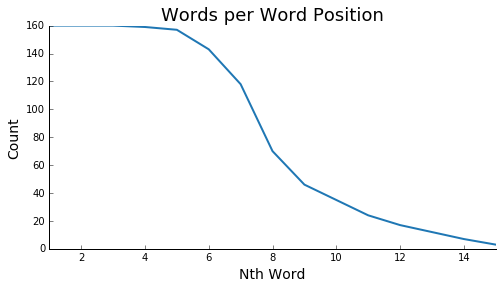

In [9]:
#Instances by word position in sentence
data = df[['PhonemeHitBool','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').count()
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Words per Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Count')
hide_spines()


At higher word positions, we have fewer instances to draw from. We'll limit or view to word positions 12 or fewer to have enough instances per condition to draw conclusions.

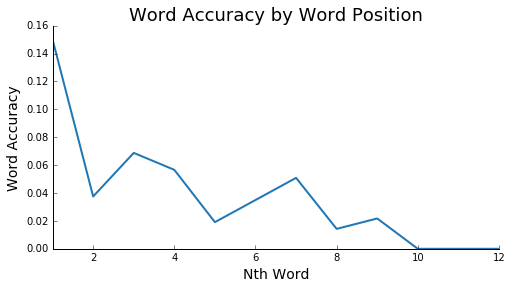

In [10]:
#Instances by word position in sentence
data = df[['WordACC','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').mean()[0:12]
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Word Accuracy by Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Word Accuracy')
hide_spines()

We have a lovely linearish negative relationship between phoneme accuracy and word position. Wow! >30% drop between the first and 12th word. Same result for phoneme accuracy?

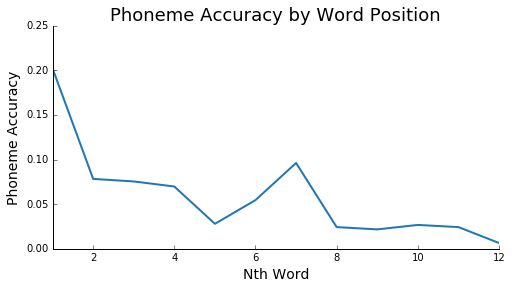

In [11]:
#Instances by word position in sentence
data = df[['PhonemeHitBool','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').mean()[0:12]
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Phoneme Accuracy by Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Phoneme Accuracy')
hide_spines()

Yup! Phoneme accuracy will be a bit higher overall to account for partially correct responses. Trend is the same though. Lets make this more interesting by splitting it up by condition.

In [12]:
data = df[['PhonemeHitBool','WordIdx','WordCount','VideoCond','BabbleCond']].groupby(['VideoCond','BabbleCond','WordCount']).mean()
data = data.reset_index().groupby(['WordIdx','VideoCond','BabbleCond']).mean().unstack().unstack()['PhonemeHitBool'][0:12]
ax = data.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1,2,3]])
ax.legend(loc='best')
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Word Position in Sentence')
hide_spines()

Error in callback <function post_execute at 0x0000000008E53278> (for post_execute):


ValueError: to_rgba: Invalid rgba arg "[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764)]"
float() argument must be a string or a number

ValueError: to_rgba: Invalid rgba arg "[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764)]"
float() argument must be a string or a number

There are some bumps on the curve, but it looks like the AV advantage is realatively constant throughout the sentence. The slope of phonemic loss over the sentence is a bit steeper for the Noisy Condition.

In [13]:
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
ax = sumbyRatio.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1]])
ax.legend(loc='best')
ax.set_ylabel('SumbyRatio')
ax.set_xlabel('Word Position in Sentence')
hide_spines()


KeyError: 'Auditory Only'

It's a bit noisy, but you can generally see a higher Sumby Ratio for Noisy sentences, as well as a decline in the Sumby ratio with increasing sentence length.

### Do some phonemes benefit from speechreading more than others?

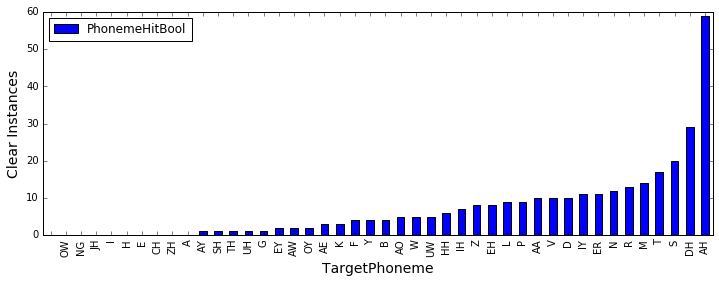

In [15]:
data = df.loc[df['BabbleCond'] =='Clear',:]
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]
data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme']).sum()
instances = data
data = data.sort_values('PhonemeHitBool')
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='best')
ax.set_ylabel('Clear Instances')


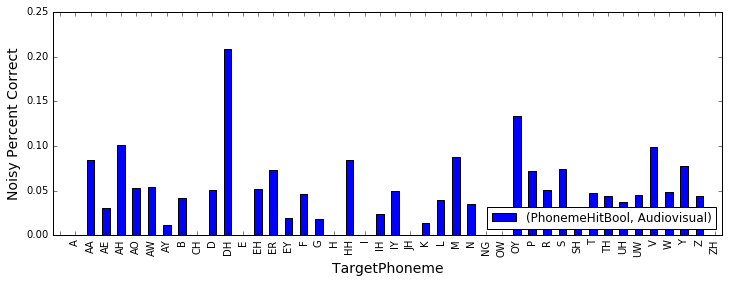

In [17]:
data = df.loc[df['BabbleCond'] =='Clear',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('Noisy Percent Correct')
avNoisyPHit = data['PhonemeHitBool','Audiovisual']

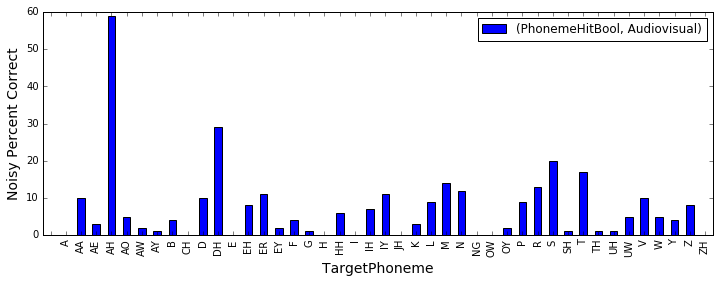

In [18]:
data = df.loc[df['BabbleCond'] =='Clear',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).sum()
data = data.unstack()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='best')
ax.set_ylabel('Noisy Percent Correct')
avNoisyPHitSum = data['PhonemeHitBool','Audiovisual']



In [19]:
avGain = avNoisyPHitSum-aoNoisyPHitSum
avGainRank = avGain.rank(ascending = False)
avGain.name = 'Count'
data = avGain.sort_values()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('AV Correct-AO Correct Sums')

NameError: name 'aoNoisyPHitSum' is not defined

,PhonemeHitBool
TargetPhoneme,
,42
A,42
AA,16
AE,24
AH,29
AO,5
AW,27
AY,10
B,13


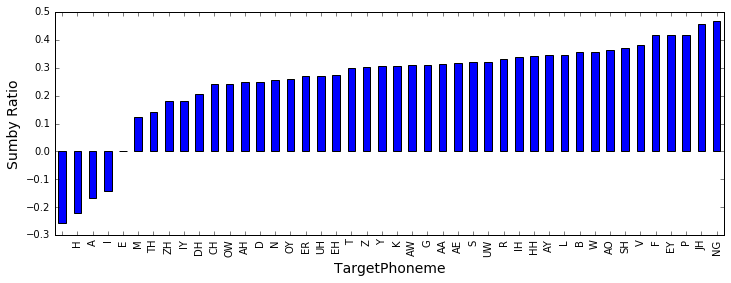

In [19]:
data = df.loc[df['BabbleCond'] =='Clear',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
data = data.join(sumbyRatio)
#instances.name = 'Count'
#data = data.join(instances)
data.columns = ['AV','AO','SumbyRatio']
data = data.sort_values('SumbyRatio')
ax =data['SumbyRatio'].plot(kind ='bar',figsize=(12,4),legend = None)
ax.set_ylabel('Sumby Ratio')

Yay! AV weights for all noisy phonemes!

In [20]:
import os
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
sumbyRank = sumbyRatio.rank()
aoNoisyRank = aoNoisyPHit.rank()
avNoisyRank = avNoisyPHit.rank()
rankDif = avNoisyRank-aoNoisyRank
rankDifNorm = (rankDif-min(rankDif))/max(rankDif-min(rankDif))
rankDifNorm

TargetPhoneme
      0.473684
A     0.508772
AA    0.508772
AE    0.543860
AH    0.228070
AO    0.614035
AW    0.526316
AY    0.631579
B     0.666667
CH    0.333333
D     0.385965
DH    0.298246
E     0.543860
EH    0.333333
ER    0.350877
EY    0.701754
F     0.842105
G     0.543860
H     0.491228
HH    0.666667
I     0.526316
IH    0.561404
IY    0.087719
JH    0.526316
K     0.491228
L     0.614035
M     0.000000
N     0.315789
NG    1.000000
OW    0.315789
OY    0.491228
P     0.859649
R     0.561404
S     0.596491
SH    0.631579
T     0.456140
TH    0.245614
UH    0.421053
UW    0.508772
V     0.771930
W     0.684211
Y     0.508772
Z     0.508772
ZH    0.508772
dtype: float64

Let's visualize the advantage of having visual information at the phonetic level a better way, with the help of an interactive phonetic chart! Lots of code below so be patient!

In [21]:

global cmaps
def BokehTable(cmaps):
    from bokeh.models import HoverTool, ColumnDataSource,CustomJS
    from bokeh.plotting import figure, show, output_file
    import pandas as pd
    import os
    from bokeh.io import output_notebook,vform,push_notebook
    global source
    

    cmap = cmaps[0]
    output_notebook()
    #dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.csv'))
    dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
    #cmap = [aoNoisyRank.loc[aoNoisyRank.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(aoNoisyRank.values)
    #cmap = [rankDifNorm.loc[rankDifNorm.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(rankDifNorm.values)
        
    source = ColumnDataSource(
        data=dict(
            xaxis=[str(x) for x in dfPT['AdrianXCoord']],
            yaxis=[str(y) for y in dfPT['AdrianYCoord']],
            cmu=[str(s) for s in dfPT['CMU Phonemes']],
            type=[str(x) for x in cmap],
            sym=[x for x in dfPT['IPA symbol']],
            jrank=[x for x in dfPT['Jeffers Visibility Rank']],
            mpcrank=[x for x in dfPT['MPC Rank']], 
            gvrank=[x for x in dfPT['Gillen Based Visual Weight'].rank(ascending=False)],
            gaorank=[x for x in dfPT['Gillen Audio Only Clear Hit Rate'].rank(ascending=False)],
            example=[x for x in dfPT['CMU Examples']],   
            type_color = ['#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap] #Must be hexadecima
        )
    )

    p = figure(tools="resize,hover,save")
    p.plot_width = 1200
    p.toolbar_location = None
    p.outline_line_color = None

    p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
           fill_alpha=0.6, color="type_color")

    #p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
    #       fill_alpha=0.6)

    text_props = {
        "source": source,
        "angle": 0,
        "color": "black",
        "text_align": "left",
        "text_baseline": "middle"
    }

    p.text(x="xaxis", y="yaxis", text="sym",
           text_font_style="bold", text_font_size="15pt", **text_props)



    p.grid.grid_line_color = None

    p.select_one(HoverTool).tooltips = [
        ("cmu", "@cmu"),
        ("example", "@example"),
        ("jrank","@jrank"),
        ("mpcrank","@mpcrank"),
        ("gaorank","@gaorank"),
        ("gvrank","@gvrank"),

    ]
    show(p) 
    
def update(f):
    from bokeh.io import push_notebook
    cmap = cmaps[titles.index(f)] 
    type_color = ['#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap]
    source.data['type_color'] = type_color
    push_notebook() 

In [26]:
import os
data = df.loc[df['BabbleCond'] =='Clear',:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme']).mean()

avRank = data.rank(ascending = False)
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')

cmaps =[]
titles =[]

Jeffers = dfPT['Jeffers Visibility Rank']
titles.append('Jeffers Visibility Map')
cmaps.append(Jeffers/max(Jeffers))

MPC = dfPT['MPC Rank']
titles.append('Movement-to-Phonetic Correspondance Map')
cmaps.append(MPC/max(MPC))

titles.append('Audiovisual Noisy Rank Map')
cmaps.append([avRank.loc[avRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(avRank.values)) 


#pd.concat([Jeffers,dfPT['CMU Phonemes'][0:39]],axis=1).set_index('CMU Phonemes')

Here it is! Use the drop down menu below to select the coloring scheme for the phonetic chart.

In [29]:
from IPython.html.widgets import interact
interact(update,f=titles)

In [30]:
BokehTable(cmaps)    

Loading BokehJS ...

In [ ]:
#For future reference
#callback = CustomJS(args=dict(source=source), code="""
#        var data = source.get('data');
#        var f = cb_obj.get('value')
#        x = data['x']
#        y = data['y']
#        for (i = 0; i < x.length; i++) {
#            y[i] = Math.pow(x[i], f)
#        }
#        source.trigger('change');
#    """)


We can also look at the map for the clear data

In [214]:
data = df.loc[df['BabbleCond'] =='Clear',:]


data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
sumbyRank = sumbyRatio.rank(ascending = False)
cmaps = []
titles = []
cmaps.append([sumbyRank.loc[sumbyRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(sumbyRank.values))
titles.append('Sumby Clear Visibility Map')
BokehTable(cmaps)

Loading BokehJS ...

### Did participants have similar SNR values across speakers and each other?

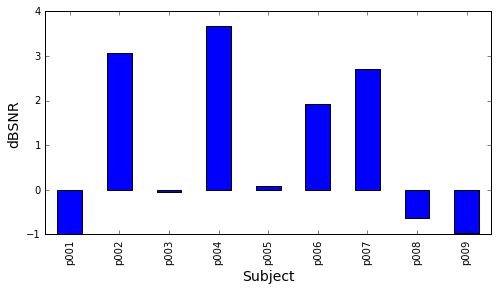

In [225]:
#Mean dBSNR for each participant to hit 50% word accuracy threshold with babble background noise
ax = df[['dBSNR','Speaker','Subject']][df['BabbleCond'] == 'Noisy'].groupby('Subject').mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('dBSNR')

Looks like there was not too much variance between individual's ability to perform the task in noise. We could probably set a single dBSNR value (say, 0 dBSNR) for all subjects in future studies if needed.

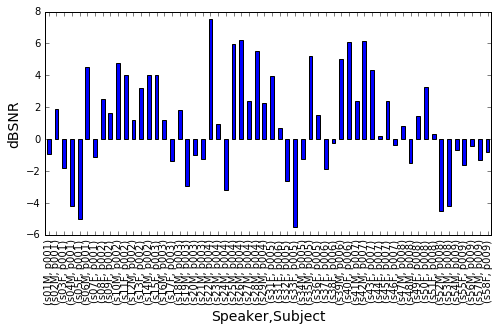

In [228]:
#Mean dBSNR for each talker to hit 50% word accuracy threshold with babble background noise
ax = df[['dBSNR','Speaker','Subject']][df['BabbleCond'] == 'Noisy'].groupby(['Speaker','Subject']).mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('dBSNR')

However, some speakers are much easier to understand in noise than others. Setting a single dBSNR value across talkers may result in floor or ceiling performance on some blocks.

Also, worth noting that there is no convincing evidence that participants are improving over blocks, though the individual speaker variation may be swamping this out.

### Did participants improve over the course of of each block as they got used to the speaker?

In [31]:
data = df[['dBSNR','Speaker','Subject','TrialNum']][df['BabbleCond'] == 'Noisy'].groupby('TrialNum').mean()
data.plot(kind = 'line',figsize=(8,4),legend = None)
ax.set_ylabel('dBSNR')

#From Dan Allen
import statsmodels.api as sm
def fit_line2(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse
x = data.index
y = data.values
m, b = fit_line2(x,y)
N = 100 # could be just 2 if you are only drawing a straight line...
points = np.linspace(x.min(), x.max(), N)
plt.plot(points, m*points + b)


TypeError: Empty 'DataFrame': no numeric data to plot

Yes, participants improved by about 1 dBSNR over 30 trials. Not a huge improvement, but something.